In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [44]:
features = np.load('../data/LibriSpeech/features.npy')
transcriptions = np.load('../data/LibriSpeech/transcriptions.npy')
ids = np.load('../data/LibriSpeech/ids.npy')

In [45]:
features.shape

(3262, 11, 2703)

In [53]:
features[:,:,0].shape

(3262, 11)

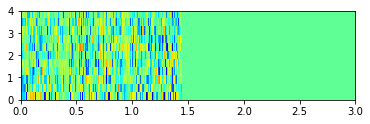

In [58]:
plt.imshow(np.flipud(features[:,:,10].T), cmap=plt.cm.jet, aspect=0.2, extent=[0,3,0,4])